In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from hublib.ui import Submit
import numpy as np
import ipywidgets as w
from IPython.display import display

<IPython.core.display.Javascript object>

In [2]:
# need this because this example is running in a read-only directory
import os
try:
    os.mkdir('/tmp/submit')
except:
    pass
os.chdir('/tmp/submit')

# RC Circuit

<img  src="rc.png" style="width: 10%; float: left"/>
A capacitor is charged in series with a resistor.  
The voltage across the capacitor can be expressed as
$V_c(t) = V_0(1-e^{-t/(R*C)})$

Clearly we don't need to use Submit to have this run on a cluster.  But for this example, we want something simple so we can get results quickly.

In [3]:
# this is the function called when the run button is clicked

def my_start(s):
    # get a unique runname 
    rname = 'rctest'
    # run locally for this demo, but it works on other venues
    submit_str = '--local /apps/pegtut/current/examples/capacitor_voltage/sim1.py  --Vin=%s' % (vin.value)
    s.run(rname, submit_str) 

In [4]:
# after the run finished, plot the data

def plot_data(s, rdir):
    # We ignore rdir because submit puts non-parametric runs in the current directory
    # When caching is enabled, they get put in a chached directory and rdit is always used.
    
    plt.figure('Capacitor Voltage')  
    plt.clf()  # clear old plot

    # our simulation writes to 'out.log'
    vals = np.loadtxt('out.log')
    x = vals[:,0]
    y = vals[:,1]
    plt.plot(x,y)
    plt.ylabel('$V_c$')
    plt.xlabel('Time (seconds)')
    plt.title('Vin = %.1f' % vin.value)
    plt.show()

In [5]:
# Just to show how it is done, we create two widgets linked
# to give the user different options for entering the input voltage

vin = w.FloatSlider(
    value=10,
    min=0,
    max=50.0,
    step=0.1,
    description='Vin:',
    readout_format='.1f',
)

vin2 = w.BoundedFloatText(
    min=0,
    max=50.0,
    description='Vin:',
)
mylink = w.jslink((vin, 'value'), (vin2, 'value'))

<IPython.core.display.Javascript object>


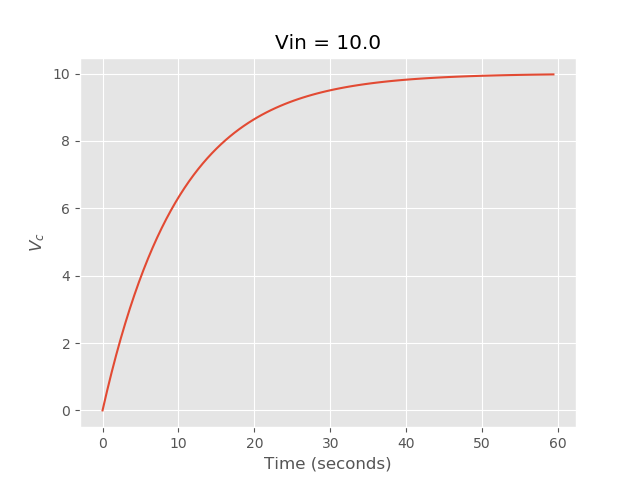

In [6]:
# we want the plot to go here, so create an empty one initially
plt.figure('Capacitor Voltage')
plt.ylabel('$V_c$')
plt.xlabel('Time (seconds)')
plt.show()

In [7]:
display(vin, vin2)

FloatSlider(value=10.0, description='Vin:', max=50.0, readout_format='.1f')

BoundedFloatText(value=0.0, description='Vin:', max=50.0)

In [8]:
# use Submit widget without a cache
Submit(start_func=my_start, done_func=plot_data)

VBox(children=(Button(button_style='success', description='Run', style=ButtonStyle(), tooltip='Run Simulation'),))